In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [3]:
sns.set_context('poster')
sns.set_style('white')

In [4]:
ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['X', 'P', 's', 'D', 'o']
aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'
e2_color= '#f2f2f2'
eallorder= ['e1','e2', 'e3', 'e4', 'e5', 'e6']
eallpallete = ['#6cf0ba', '#f2f2f2', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']

efcmorder= ['e1','e2', 'e4', 'e5', ]
efcmpallete = ['#6cf0ba', '#f2f2f2',  '#eeb7cb', '#b9d2d8',]

espallete = ['#6cf0ba', '#D55282', '#538B9B']
#  604 #FCC479
#     #ffd7a1
#     #fcb14c
#     MED4 = #62A586
#     9313 #F47681
#     natl #7A9BC8

In [5]:
ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
psizes = [150,120,200,120,350]
pmarkers = ['o', 's', '^', 'D', '*']

# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['P', 'X', 'h', '<','>']
apallete = ['#6dad36', '#c7e89f', '#f5c4e1', '#d5579d', '#8a0850']

aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'

espallete = ['#6cf0ba', '#D55282', '#538B9B']

In [68]:
xlsx_fname =  'Shira Prochlorococcus growth curves analyses - temperatures - updated.xlsx'

In [69]:
y = pd.read_excel(xlsx_fname, sheet_name=None, index_col=0, header=None)

In [70]:
y.keys()

dict_keys(['MIT9312', 'MIT9313', 'MED4', 'NATL2A', 'Dates and numbers'])

In [71]:
df = y['MIT9312'].T
df = df.dropna(how='all', axis=1)
df = df.dropna(how='all', axis=0)
df = df.drop('Date', axis=1)
df.head()

,Day,9312 18⁰C -1,9312 22⁰C -1,Day,9312 18⁰C -2,9312 22⁰C -2,Day,9312 18⁰C -3,9312 22⁰C -3,Day,...,9312 18⁰C -9,9312 22⁰C -9,Day,9312 26°C -1,Day,9312 26°C -2,Day,9312 26°C -3,Day,9312 26°C -4
1,0,0.405,0.442,0,1.051,1.311,0,0.722,1.115,0,...,0.785,1.012,0,0.296,0,0.318,0,0.743,0,0.66
2,0.920833,1.05,1.059,0.922917,1.478,1.566,1.017361,0.919,1.588,3.083333,...,0.91,1.366,1.111806,0.259,9.115972,0.693,1.102778,1.361,1.049306,1.248
3,3.904167,3.096,2.987,1.738889,1.663,2.104,7.722917,3.597,4.949,3.857639,...,2.137,4.51,2.961806,0.468,10.138889,1.21,2.144444,2.776,4.090278,4.739
4,6.864583,4.438,6.143,4.780556,3.478,5.498,8.974306,3.401,4.466,5.038889,...,4.301,7.015,7.947917,4.068,13.940972,5.851,3.063194,4.436,5.191667,5.563
5,8.016667,4.78,7.184,5.975,3.842,6.47,9.922917,3.252,4.498,6.910417,...,4.202,4.41,9.115972,5.429,15.061806,4.543,6.024306,4.607,6.095139,5.454


In [72]:
df.columns

Index(['Day', '9312 18⁰C -1', '9312 22⁰C -1', 'Day', '9312 18⁰C -2',
       '9312 22⁰C -2', 'Day', '9312 18⁰C -3', '9312 22⁰C -3', 'Day',
       '9312 18⁰C -4', '9312 22⁰C -4', 'Day', '9312 18⁰C -5', '9312 22⁰C -5',
       'Day', '9312 18⁰C -6', '9312 22⁰C -6', 'Day', '9312 18⁰C -7',
       '9312 22⁰C -7', 'Day', '9312 18⁰C -8', '9312 22⁰C -8', 'Day',
       '9312 18⁰C -9', '9312 22⁰C -9', 'Day', '9312 26°C -1', 'Day',
       '9312 26°C -2', 'Day', '9312 26°C -3', 'Day', '9312 26°C -4'],
      dtype='object', name=0)

In [73]:
idx = 0
experiments = []
for i in df.columns:
    if i in ['Day', 'day']:
        idx = idx + 1
    experiments.append(idx)
colnames = pd.Series(df.columns.isin(['Day', 'day'])).map({True: 'day', False: 'FL'})

df.columns = pd.MultiIndex.from_frame(pd.DataFrame({'experiment': experiments, 'Sample': df.columns,# 'colname': colnames, 
                                                   }))


In [74]:
def _process(k,d):
    print('running', k)
    df = d.T
    df = df.dropna(how='all', axis=1)
    df = df.dropna(how='all', axis=0)
    if 'Date' in df.columns:
        df = df.drop('Date', axis=1)
    idx = 0
    experiments = []
    for i in df.columns:
        if i in ['Day', 'day']:
            idx = idx + 1
        experiments.append(idx)

    df.columns = pd.MultiIndex.from_frame(pd.DataFrame({'experiment': experiments, 'Sample': df.columns,
                                                   }))
    d = df.reset_index(drop=True).stack(level='experiment').reset_index().drop(
        columns=['level_0', 'experiment']).reset_index(drop=True)
    mdf = d.melt(id_vars = ['Day'], var_name='Sample', value_name='FL')
    mdf = mdf.dropna(subset=['FL'])
    mdf['sheet_name'] = k
    
    return mdf

df = pd.concat([_process(k, y[k]) for k in y if k != 'Dates and numbers'])

running MIT9312
running MIT9313
running MED4
running NATL2A


In [75]:
df

,Day,Sample,FL,sheet_name
0,0,9312 18⁰C -1,0.405,MIT9312
13,0.920833,9312 18⁰C -1,1.05,MIT9312
26,3.904167,9312 18⁰C -1,3.096,MIT9312
39,6.864583,9312 18⁰C -1,4.438,MIT9312
52,8.016667,9312 18⁰C -1,4.78,MIT9312
...,...,...,...,...
582,6.028472,NATL2A 22⁰C -5,6.663,NATL2A
587,7.048611,NATL2A 22⁰C -5,7.901,NATL2A
592,10.853472,NATL2A 22⁰C -5,6.312,NATL2A
597,18.021528,NATL2A 22⁰C -5,3.461,NATL2A


In [76]:
df.Sample.unique()

array(['9312 18⁰C -1', '9312 18⁰C -2', '9312 18⁰C -3', '9312 18⁰C -4',
       '9312 18⁰C -5', '9312 18⁰C -6', '9312 18⁰C -7', '9312 18⁰C -8',
       '9312 18⁰C -9', '9312 22⁰C -1', '9312 22⁰C -2', '9312 22⁰C -3',
       '9312 22⁰C -4', '9312 22⁰C -5', '9312 22⁰C -6', '9312 22⁰C -7',
       '9312 22⁰C -8', '9312 22⁰C -9', '9312 26°C -1', '9312 26°C -2',
       '9312 26°C -3', '9312 26°C -4', '9313 18⁰C -1', '9313 18⁰C -2',
       '9313 18⁰C -3', '9313 18⁰C -6', '9313 22⁰C -1', '9313 22⁰C -2',
       '9313 22⁰C -3', '9313 22⁰C -4', '9313 22⁰C -5', '9313 22⁰C -6',
       '9313 22⁰C -7', 'MED4 18⁰C -2', 'MED4 18⁰C -3', 'MED4 18⁰C -4',
       'MED4 18⁰C -5', 'MED4 18⁰C -6', 'MED4 22⁰C -1', 'MED4 22⁰C -2',
       'MED4 22⁰C -3', 'MED4 22⁰C -4', 'MED4 22⁰C -5', 'MED4 22⁰C -6',
       'NATL2A 18⁰C -2', 'NATL2A 18⁰C -3', 'NATL2A 18⁰C -4',
       'NATL2A 18⁰C -5', 'NATL2A 22⁰C -1', 'NATL2A 22⁰C -2',
       'NATL2A 22⁰C -3', 'NATL2A 22⁰C -4', 'NATL2A 22⁰C -5'], dtype=object)

In [77]:
df = df.rename(columns={'Day': 'day'})

In [79]:
df.groupby(['sheet_name','Sample'])['day'].max()

sheet_name  Sample        
MED4        MED4 18⁰C -2      58.053472
            MED4 18⁰C -3      49.077778
            MED4 18⁰C -4      38.003472
            MED4 18⁰C -5      28.911111
            MED4 18⁰C -6      19.865972
            MED4 22⁰C -1      48.974306
            MED4 22⁰C -2      58.053472
            MED4 22⁰C -3      49.077778
            MED4 22⁰C -4      38.003472
            MED4 22⁰C -5      28.911111
            MED4 22⁰C -6      19.865972
MIT9312     9312 18⁰C -1      50.887500
            9312 18⁰C -2      41.741667
            9312 18⁰C -3      48.731944
            9312 18⁰C -4      47.785417
            9312 18⁰C -5      37.854167
            9312 18⁰C -6      26.756250
            9312 18⁰C -7      48.974306
            9312 18⁰C -8      58.053472
            9312 18⁰C -9      49.077778
            9312 22⁰C -1      50.887500
            9312 22⁰C -2      41.741667
            9312 22⁰C -3      48.731944
            9312 22⁰C -4      47.785417
            9

In [80]:
df.isna().sum()

day           0
Sample        0
FL            0
sheet_name    0
dtype: int64

In [92]:
def calculate_lag(d):
    minday_fl_threshold = 0.1
    r2_threshold = 0.9
    reg = None 
    intercept = None
    coef = None
    r2 = -1000 
    L = None
    maxday = None
    maxFL = None

    d = d.reset_index(drop=True)
    if d.shape[0] > 2:
        maxindex = d.FL.idxmax()
        maxday = d.loc[maxindex]['day']
        maxFL = d.loc[maxindex]['FL']
        minday = d.loc[(d.day < maxday) & (d.FL <= minday_fl_threshold), 'day'].max()
        if minday is np.NaN:
            minday = d.day.min()

        minday = min(maxday-7,minday)
        dfit = d.loc[(d.day > minday) & (d.day <= maxday)]
        if dfit.shape[0] > 2:
            reg, intercept, coef, r2 = cp.fit_regression(dfit, 'day', 'logFL')

            L = maxday - ((d.loc[maxindex]['logFL'] - d.loc[0]['logFL']) / coef)
    return pd.Series({
         'maxday' : maxday,
#         'minday' : minday,
         'maxFL' : maxFL,
#         'logFL0' : d.loc[0]['logFL'],
#         'log10FL0' : np.log10(d.loc[0]['FL']),
        'intercept': intercept,
        'Growth Rate': coef,
        'r2': r2,
        'Lag' : L,
    })

def get_prev_max_day_df(d, minmaxday_threshold):
    d = d.reset_index(drop=True)
    if d.shape[0] < 3:
        return None
    
    maxindex = d.FL.idxmax()
    maxday = d.loc[maxindex]['day']
    maxdaysdf = d.loc[(d.FL > d.FL.shift()) & (d.FL > d.FL.shift(-1)) & 
                    (d.day < maxday)].reset_index(drop=True)
    if maxdaysdf.shape[0] > 0:
        newmaxindex = maxdaysdf.FL.idxmax()
        newmaxday = maxdaysdf.loc[newmaxindex]['day']

        if ((newmaxday is not np.NaN) and #(newmaxday >= minmaxday_threshold) and 
            (d.loc[d.day == newmaxday, 'FL'].max() > (d.FL.max() / 2))):
            df_prevmax = d.loc[d.day < newmaxday]
            return df_prevmax
    return None

def get_no_outlier_df(d, minday_fl_threshold):
    d_no_outlier = d.loc[(d.FL > minday_fl_threshold) | 
                         (d.FL.shift() < minday_fl_threshold*2) |
                         (d.FL.shift(-1) < minday_fl_threshold*2)
                        ]
    return d_no_outlier

def get_without_max_df(d):
    d = d.reset_index(drop=True)
    maxindex = d.FL.idxmax()
    maxday = d.loc[maxindex]['day']
    d_withoutmaxday = d.loc[d.day < maxday]
    return d_withoutmaxday

def get_decline_df(d):
    d = d.reset_index(drop=True)
    maxindex = d.FL.idxmax()
    maxday = d.loc[maxindex]['day']
    d_withoutmaxday = d.loc[d.day > maxday]
    return d_withoutmaxday

def get_decline_rate(d):
    minday_fl_threshold = 0.1
    r2_threshold = 0.9
    reg = None 
    intercept = None
    coef = None
    r2 = -1000 
    L = None
    maxday = None
    maxFL = None

    d = d.reset_index(drop=True)
    if d.shape[0] > 2:
        maxindex = d.FL.idxmax()
        maxday = d.loc[maxindex]['day']
        maxFL = d.loc[maxindex]['FL']

        dfit = d.loc[(d.day >= maxday)]
        if dfit.shape[0] > 2:
            reg, intercept, coef, r2 = cp.fit_regression(dfit, 'day', 'logFL')

    return pd.Series({
        'decline_intercept': intercept,
        'Decline Rate': -coef,
        'decline r2': r2,
    })

def get_df_list(d, minday_fl_threshold, minmaxday_threshold):
    df_list = [d]
    try:
        dnomax = get_without_max_df(d)
        df_list.append(dnomax)
        dnomax2 = get_without_max_df(dnomax)
        df_list.append(dnomax2)
        df_list1 = df_list.copy()
        for x in df_list1:
            df_list.append(get_no_outlier_df(x, minday_fl_threshold))
    except Exception:
        pass

    return df_list

def calculate_lag_wrap(d):
    minday_fl_threshold = 0.07
    minmaxday_threshold = 4
    df_list = get_df_list(d, minday_fl_threshold, minmaxday_threshold)
    d2 = get_prev_max_day_df(d,minmaxday_threshold)
    if d2 is not None:
        df_list.extend(get_df_list(d2, minday_fl_threshold, minmaxday_threshold))
    reslist = [calculate_lag(x) for x in df_list]

    sorted_reslist = sorted(reslist, key=lambda x : x['r2'], reverse=True)
    print('.', end='')
    result = sorted_reslist[0]           
    
    maxindex = d.FL.idxmax()
    result['maxday'] = d.loc[maxindex]['day']
    result['maxFL'] = d.loc[maxindex]['FL']
    #result = pd.concat([result, get_decline_rate(get_decline_df(d))])

    return result           

In [93]:
def computeL(maxday, maxlogcells, logcells0, coef):
    L = maxday - ((maxlogcells - logcells0) / coef)
    return L


In [94]:
def computeMaxDay(maxlogcells, logcells0, coef, L):
    maxday = ((maxlogcells - logcells0) / coef) + L
    return maxday


In [95]:
df.columns

Index(['day', 'Sample', 'FL', 'sheet_name', 'logFL'], dtype='object')

In [96]:
df.dropna(axis=0, subset=['FL'], inplace=True)

In [97]:
df['FL'] = pd.to_numeric(df['FL'])

In [98]:
df['FL'] = np.clip(df['FL'], a_min=0.04, a_max=None)

In [99]:
df['logFL'] = np.log(df['FL'])

In [100]:
df.isna().sum()

day           0
Sample        0
FL            0
sheet_name    0
logFL         0
dtype: int64

In [101]:
df.loc[df.day.isna()]

,day,Sample,FL,sheet_name,logFL


In [102]:
lagsdf = df.groupby([ 'sheet_name', 'Sample']).apply(calculate_lag_wrap)\
        .reset_index()

.....................................................

In [103]:
lagsdf.head()

,sheet_name,Sample,maxday,maxFL,intercept,Growth Rate,r2,Lag
0,MED4,MED4 18⁰C -2,7.177778,5.796,0.038635,0.250043,0.982641,1.515913
1,MED4,MED4 18⁰C -3,7.262500,6.978,0.283564,0.242091,0.946325,1.220099
2,MED4,MED4 18⁰C -4,8.163889,5.506,0.300790,0.214110,0.954782,-0.019283
3,MED4,MED4 18⁰C -5,6.072222,3.921,0.088280,0.206572,0.991205,0.100612
4,MED4,MED4 18⁰C -6,7.048611,3.278,-1.041149,0.348963,1.000000,0.000372


In [104]:
lagsdf.to_excel('shira_growth_rates.xlsx')

In [105]:
lagsdf.describe()

,maxday,maxFL,intercept,Growth Rate,r2,Lag
count,53.000000,53.000000,51.000000,51.000000,53.000000,51.000000
mean,9.308608,5.141472,-0.522028,0.300572,-36.791754,0.408112
std,4.170982,2.076919,0.901334,0.108147,192.568996,1.343640
min,5.191667,0.460000,-4.278947,0.074111,-1000.000000,-2.240291
25%,6.938889,3.733000,-0.836354,0.241666,0.975094,-0.045923
50%,7.722917,5.085000,-0.307360,0.297857,0.985780,0.075600
75%,10.785417,6.978000,0.063457,0.350571,0.995133,0.463579
max,24.118750,8.326000,0.690720,0.594021,1.000000,7.240034


In [106]:
lagsdf.nlargest(20, 'maxFL')

,sheet_name,Sample,maxday,maxFL,intercept,Growth Rate,r2,Lag
48,NATL2A,NATL2A 22⁰C -1,6.071528,8.326,0.316565,0.296576,0.999964,0.006467
47,NATL2A,NATL2A 18⁰C -5,10.853472,8.202,-0.382963,0.296024,0.999173,0.032064
6,MED4,MED4 22⁰C -2,6.071528,7.942,0.690720,0.233494,0.983885,-0.138389
44,NATL2A,NATL2A 18⁰C -2,11.049306,7.935,-0.114939,0.238424,0.992773,1.665158
45,NATL2A,NATL2A 18⁰C -3,11.203472,7.906,-0.732773,0.299875,0.994127,2.807927
52,NATL2A,NATL2A 22⁰C -5,7.048611,7.901,-0.004830,0.301737,0.976811,1.429721
50,NATL2A,NATL2A 22⁰C -3,8.163889,7.813,-0.432110,0.462098,0.988079,0.009732
5,MED4,MED4 22⁰C -1,6.834722,7.811,0.454791,0.293754,0.999009,0.022536
51,NATL2A,NATL2A 22⁰C -4,6.072222,7.521,0.440599,0.242291,0.886143,0.382860
24,MIT9312,9312 22⁰C -5,6.949306,7.484,-0.092110,0.416656,0.968840,-0.137997


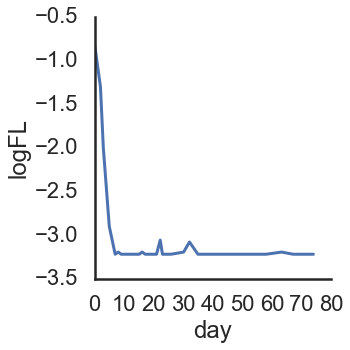

In [28]:
sns.relplot(data=df.loc[df.Sample == ' MED4 lowP (1:50) 3'],
            x='day', y='logFL', kind='line')

In [29]:
lagsdf.Sample.unique()

array([' MED4 lowN 1', ' MED4 lowN 2', ' MED4 lowN 3',
       ' MED4 lowP(1:50) 1', ' MED4 lowP(1:50) 2', ' MED4 lowP(1:50) 3',
       ' MED4 Pro99 1', ' MED4 Pro99 2', ' MED4 Pro99 3',
       ' MED4 lowP (1:50) 1', ' MED4 lowP (1:50) 2',
       ' MED4 lowP (1:50) 3', ' MED4 lowP (1:8) 1', ' MED4 lowP (1:8) 2',
       ' MED4 lowP (1:8) 3', '9312Pro99 1', '9312Pro99 2', '9312Pro99 3',
       '9312lowN 1', '9312lowN 2', '9312lowN 3', '9312lowP (1:50) 1',
       '9312lowP (1:50) 2', '9312lowP (1:50) 3', '9312lowP (1:8) 1',
       '9312lowP (1:8) 2', '9312lowP (1:8) 3', '9313Pro99 1',
       '9313Pro99 2', '9313Pro99 3', '9313lowN 1', '9313lowN 2',
       '9313lowN 3', '9313lowP (1:50) 1', '9313lowP (1:50) 2',
       '9313lowP (1:50) 3', '9313lowP (1:8) 1', '9313lowP (1:8) 2',
       '9313lowP (1:8) 3', '9313lowN/lowP (1:50) 1',
       '9313lowN/lowP (1:50) 2', '9313lowN/lowP (1:50) 3',
       '9313lowN/lowP (1:8) 1', '9313lowN/lowP (1:8) 2',
       '9313lowN/lowP (1:8) 3', 'MED4 Pro99 1',

In [30]:
lagsdf[['S', 'replicate']] = lagsdf.Sample.str.rsplit(pat=' ', n=1, expand=True)

In [31]:
lagsdf[['PRO']] = lagsdf.Sample.str.slice(stop=4)

In [32]:
lagsdf.head()

,sheet_name,Sample,maxday,maxFL,intercept,Growth Rate,r2,Lag,decline_intercept,Decline Rate,decline r2,S,replicate,PRO
0,Bottle exp.,MED4 lowN 1,17.034722,2.407,-4.508700,0.351982,0.976490,4.857721,6.136358,0.266838,0.960523,MED4 lowN,1,MED
1,Bottle exp.,MED4 lowN 2,14.797917,2.889,-3.194192,0.257620,0.857066,2.417114,3.518536,0.166913,0.959839,MED4 lowN,2,MED
2,Bottle exp.,MED4 lowN 3,14.797917,3.177,-2.918618,0.256941,0.888865,2.810380,4.697872,0.254585,0.992533,MED4 lowN,3,MED
3,Bottle exp.,MED4 lowP(1:50) 1,14.797917,0.855,-3.472785,0.272223,0.999904,4.764836,0.712101,0.075195,0.953862,MED4 lowP(1:50),1,MED
4,Bottle exp.,MED4 lowP(1:50) 2,9.861111,0.925,-2.372779,0.169814,0.986327,-0.017796,0.815924,0.093193,0.980497,MED4 lowP(1:50),2,MED


In [33]:
lagsdf.sheet_name.unique()

array(['Bottle exp.', 'Preliminary exp.', 'Secondary exp.',
       'lowN-lowP exp.'], dtype=object)

In [34]:
lagsdf.columns

Index(['sheet_name', 'Sample', 'maxday', 'maxFL', 'intercept', 'Growth Rate',
       'r2', 'Lag', 'decline_intercept', 'Decline Rate', 'decline r2', 'S',
       'replicate', 'PRO'],
      dtype='object')

In [35]:
lagsdf.rename(columns={'Growth Rate'  : 'Growth_Rate'}, inplace=True)

In [36]:
from statsmodels.formula.api import ols
for p in ['9313', 'MED4']:
    for col in ['maxFL', 'Growth_Rate']:
        dfdata = lagsdf.loc[lagsdf.sheet_name.isin(['Secondary exp.']) & lagsdf.PRO.isin([p])]

        mod = ols(f'{col} ~ C(S)',
                data=dfdata).fit()
        #print (f'++++++++++++++++++ day = {d} +++++++++++++++++++++++')
        print(f'+++++++++++++++++++++ {p} {col} as function of sample')
        print(mod.summary())
        print(sm.stats.anova_lm(mod))
        print(f'+++++++++++++++++++++ {p} {col} as function of sample')
        pair_t = mod.t_test_pairwise("C(S)", method='b')
        print(pair_t.result_frame)
        print(f'+++++++++++++++++++++++ {p} {col} as function of sample')
        print(pair_t.result_frame.loc[pair_t.result_frame['reject-b'], 'pvalue-b'])
        #aov_table = sm.stats.anova_lm(mod, typ=2)
        #print(aov_table)

+++++++++++++++++++++ 9313 maxFL as function of sample
                            OLS Regression Results                            
Dep. Variable:                  maxFL   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     690.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           2.51e-14
Time:                        13:56:58   Log-Likelihood:                 26.116
No. Observations:                  18   AIC:                            -40.23
Df Residuals:                      12   BIC:                            -34.89
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [40]:
dfd = pd.read_excel ('yara Decline rates.xlsx')

In [41]:
dfd

,Sample,decline_rates
0,MED4 Pro99,0.167
1,MED4 Pro99,0.148
2,MED4 Pro99,0.159
3,MED4 lowN,0.297
4,MED4 lowN,0.344
5,MED4 lowN,0.326
6,MED4 lowP (1:8),0.132
7,MED4 lowP (1:8),0.131
8,MED4 lowP (1:8),0.141
9,MED4 lowP (1:50),0.095


In [43]:
dfd.Sample.str.startswith('12')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
Name: Sample, dtype: bool

In [45]:
from statsmodels.formula.api import ols
for p in ['MED4', '13', '12']:
    mod = ols(f'decline_rates ~ C(Sample)',
            data=dfd.loc[dfd.Sample.str.startswith(p)]).fit()
    #print (f'++++++++++++++++++ day = {d} +++++++++++++++++++++++')
    print(p)
    print(mod.summary())
    print(sm.stats.anova_lm(mod))
    pair_t = mod.t_test_pairwise("C(Sample)", method='b')
    print(p)

    print(pair_t.result_frame)
    print(p)
    print(pair_t.result_frame.loc[pair_t.result_frame['reject-b'], 'pvalue-b'])
    #aov_table = sm.stats.anova_lm(mod, typ=2)
    #print(aov_table)

MED4
                            OLS Regression Results                            
Dep. Variable:          decline_rates   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           1.26e-06
Time:                        14:02:44   Log-Likelihood:                 33.820
No. Observations:                  11   AIC:                            -59.64
Df Residuals:                       7   BIC:                            -58.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept

C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
C:\Users\Osnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
